In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#df = pd.read_csv('results.csv', names=['EV','AV', 'count', 'penetration'])#.sort_values(by='EV')
df = pd.read_csv('results.csv')

In [5]:
df.shape

(1365210, 4)

(0.13484170888049216, 0.007033194655598483, 0.032555427469916264)
(0.15217285596194602, 0.005383452099696873, 0.030444061708184263)
(0.16947602535975897, 0.0038250840812733057, 0.028565502547076276)
(0.18681932887883318, 0.0028153431159837128, 0.02707071124262077)
(0.20415968267407303, 0.001798859569044361, 0.025584906983746544)
(0.22154723205066226, 0.0007839437490255084, 0.024238422469502034)
(0.23888508304992143, 0.00011720357230781245, 0.023250597855502375)
(0.2561701965624455, -0.00043937893684503035, 0.022105399175809982)
(0.27353012579767677, -0.0009697840309191984, 0.02103550108188856)
(0.29092554110449104, -0.0015075919988528613, 0.020250338141381934)
(0.3082919061008154, -0.001990970137871193, 0.01940117886379744)
(0.3256026732721412, -0.0021710745783345108, 0.01874191190183113)
(0.3429624237362311, -0.002654980378994943, 0.018025031231716046)
(0.36028543673074775, -0.0028675257344805334, 0.01735995529599936)
(0.37767432689089814, -0.003095776939903767, 0.016724571339022314)


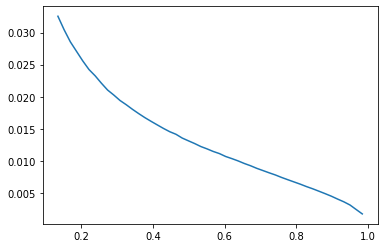

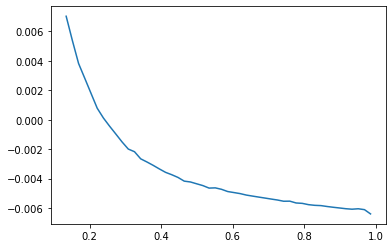

In [3]:
#plt.plot(df2.penetration, df2.EV, '.')
#df2[df2.penetration >= 0.5].EV.hist(bins=100)
df2 = df[df.penetration<1].sort_values(by='penetration')
data = []
for g in np.array_split(df2,50):
    #g.EV.hist(bins=100)
    data.append((g.penetration.mean(), g.EV.mean(), g.EV.std()))
    print(data[-1])
    
    #plt.title('%.2f Penetration' % g.penetration.mean())
    #plt.show()
data = np.array(data)
plt.plot(data[:,0], data[:,2])
plt.show()
plt.plot(data[:,0], data[:,1])

In [ ]:
# Mean and Std is a functionf of penetration

Text(0, 0.5, 'Average Actual Value (AV)')

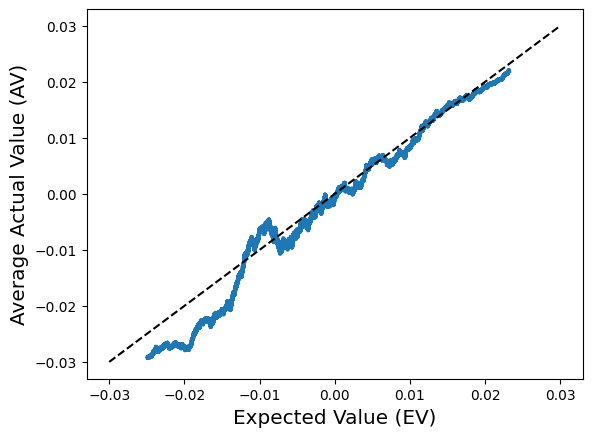

In [24]:
rolling_avg = df2.rolling(200000).mean()
plt.plot(rolling_avg.EV, rolling_avg.AV, linewidth=3)
plt.plot([-0.03, 0.03], [-0.03, 0.03], 'k--')
plt.xlabel('Expected Value (EV)', fontsize='x-large')
plt.ylabel('Average Actual Value (AV)', fontsize='x-large')

(1365210, 4)

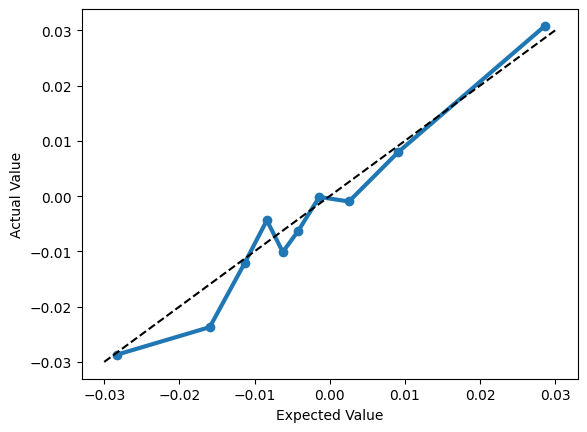

In [6]:
df2 = df[df.penetration >= 0].sort_values(by='EV')
bins = 10
evs = [np.mean(x) for x in np.array_split(df2.EV.values, bins)]
avs = [np.mean(x) for x in np.array_split(df2.AV.values, bins)]
plt.plot(evs, avs, 'o-', linewidth=3)
plt.plot([-0.03, 0.03], [-0.03, 0.03], 'k--')
plt.xlabel('Expected Value')
plt.ylabel('Actual Value')
df2.shape

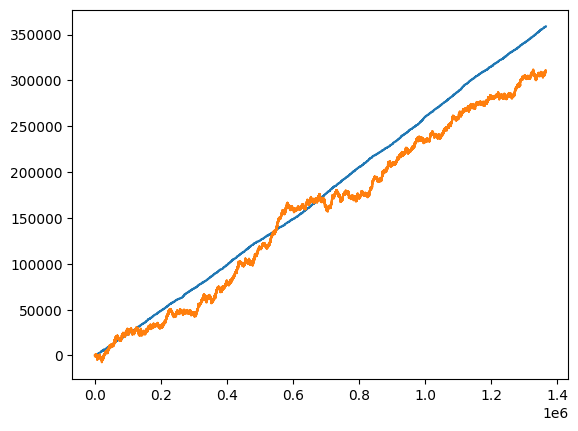

In [38]:
df = df.copy() #sample(frac=1)
t = 0.01
#df = pd.read_csv('results.csv', names=['EV','AV', 'count', 'penetration'])#.sort_values(by='EV')
#df = df[df.penetration > 0.5]
df['bet'] = 10*(df.EV <= t) + 100*(df.EV > t)
(df.bet * df.AV).sum()

evs = (df.EV*df.bet).cumsum()
avs = (df.AV*df.bet).cumsum()
plt.plot(evs.values)
plt.plot(avs.values)

In [6]:
df.sort_values(by='EV').tail(1000).mean()

EV               0.090303
AV               0.078500
count           15.373000
penetration      0.158673
bet            100.000000
dtype: float64

Text(0, 0.5, 'Profit')

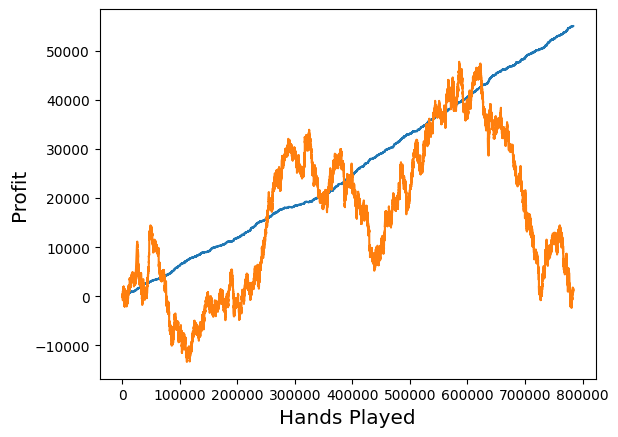

In [42]:
cond = df.penetration > 0.5
bankroll = 10000
minbet = 10
df['true_count'] = df['count'] / (8*df.penetration)
df['count_EV'] = df['true_count']*0.005 - 0.005
df['bet'] = np.maximum(minbet, df['EV']*bankroll)
df['bet_count'] = np.maximum(10, df['count_EV']*bankroll)
df['net_AV'] = df['bet'] * df['AV']
df['net_EV'] = df['bet'] * df['EV']
df['net_count_EV'] = df['bet_count'] * df['count_EV']
df['net_count_AV'] = df['bet_count'] * df['AV']

plt.plot(df[cond]['net_EV'].cumsum().values)
plt.plot(df[cond]['net_AV'].cumsum().values)
plt.xlabel('Hands Played', fontsize='x-large')
plt.ylabel('Profit', fontsize='x-large')
#plt.plot(df[cond]['net_count_EV'].cumsum().values)

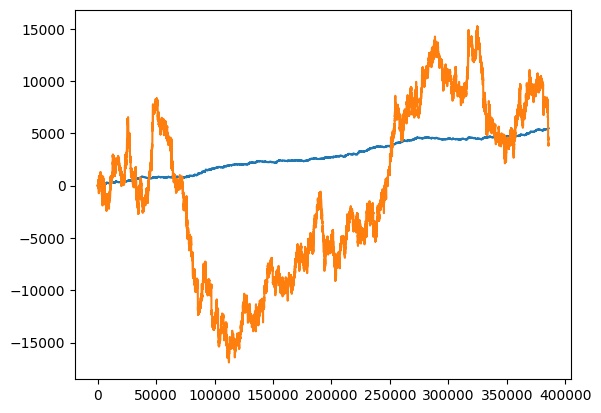

In [74]:
plt.plot(df[cond]['net_count_EV'].cumsum().values)
plt.plot(df[cond]['net_count_AV'].cumsum().values)

(array([4.50720150e-02, 1.88347814e-03, 1.61294020e-03, 1.39650985e-03,
        1.18152412e-03, 1.02677466e-03, 8.91461915e-04, 7.90951379e-04,
        6.83392848e-04, 5.99955094e-04, 5.18925041e-04, 4.56237285e-04,
        4.00728853e-04, 3.56295842e-04, 3.13964096e-04, 2.73996274e-04,
        2.49656615e-04, 2.18181408e-04, 1.96205672e-04, 1.72128671e-04,
        1.55230993e-04, 1.36188274e-04, 1.22311166e-04, 1.08784269e-04,
        9.86719287e-05, 8.72025208e-05, 8.00669732e-05, 7.01297381e-05,
        6.48765742e-05, 5.86165539e-05, 5.31007318e-05, 4.43016823e-05,
        4.04493621e-05, 3.62468310e-05, 3.47146581e-05, 3.17816416e-05,
        2.79730978e-05, 2.42083303e-05, 2.21946175e-05, 1.75105464e-05,
        1.72916645e-05, 1.50152935e-05, 1.29578043e-05, 1.12943024e-05,
        1.05063278e-05, 9.28058957e-06, 8.58016771e-06, 7.39820583e-06,
        6.87288944e-06, 6.43512578e-06, 4.99050571e-06, 5.20938754e-06,
        4.33386022e-06, 4.24630749e-06, 4.07120203e-06, 3.370780

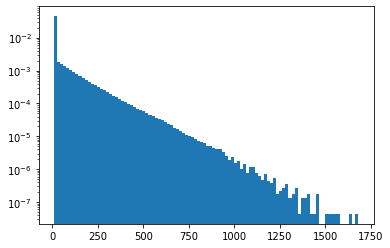

In [19]:
plt.hist(df.bet, bins=100, log=True, density=True)

In [38]:
df[(df.EV > 0) & (df.true_count <= 0)].sort_values('true_count')

,EV,AV,count,penetration,bet,true_count,count_EV,bet_count,net_AV,net_EV,net_count_EV,net_count_AV
1849,0.033446,1.0,-26,0.139423,334.45500,-23.310345,-0.121552,10.0,334.45500,11.186015,-1.215517,10.0
1848,0.019292,1.0,-28,0.153846,192.92100,-22.750000,-0.118750,10.0,192.92100,3.721851,-1.187500,10.0
1847,0.004135,0.0,-31,0.170673,41.35110,-22.704225,-0.118521,10.0,0.00000,0.170991,-1.185211,0.0
646434,0.008557,-1.0,-9,0.163462,85.56920,-6.882353,-0.039412,10.0,-85.56920,0.732209,-0.394118,-10.0
219600,0.003649,1.0,-7,0.127404,36.49330,-6.867925,-0.039340,10.0,36.49330,0.133176,-0.393396,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...
457399,0.001191,1.0,0,0.483173,11.91030,0.000000,-0.005000,10.0,11.91030,0.014186,-0.050000,10.0
933182,0.001404,-1.0,0,0.324519,14.04060,0.000000,-0.005000,10.0,-14.04060,0.019714,-0.050000,-10.0
933183,0.000206,-1.0,0,0.310096,2.05641,0.000000,-0.005000,10.0,-2.05641,0.000423,-0.050000,-10.0
457980,0.000730,0.0,0,0.685096,7.30274,0.000000,-0.005000,10.0,0.00000,0.005333,-0.050000,0.0


In [44]:
df[(df.EV < 0) & (df.true_count >= 1)].sort_values('true_count')

,EV,AV,count,penetration,bet,true_count,count_EV,bet_count,net_AV,net_EV,net_count_EV,net_count_AV
1311467,-0.003769,-1.0,4,0.500000,0.0,1.000000,0.000000,10.000000,-0.0,-0.0,0.000000,-10.000000
65355,-0.000664,-1.0,2,0.250000,0.0,1.000000,0.000000,10.000000,-0.0,-0.0,0.000000,-10.000000
352484,-0.001553,0.0,7,0.875000,0.0,1.000000,0.000000,10.000000,0.0,-0.0,0.000000,0.000000
351789,-0.005083,0.0,3,0.375000,0.0,1.000000,0.000000,10.000000,0.0,-0.0,0.000000,0.000000
350029,-0.000532,1.0,7,0.875000,0.0,1.000000,0.000000,10.000000,0.0,-0.0,0.000000,10.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
603546,-0.000141,-0.5,7,0.271635,0.0,3.221239,0.011106,111.061947,-0.0,-0.0,1.233476,-55.530973
246232,-0.000413,2.0,4,0.151442,0.0,3.301587,0.011508,115.079365,0.0,-0.0,1.324326,230.158730
506522,-0.000409,1.0,5,0.177885,0.0,3.513514,0.012568,125.675676,0.0,-0.0,1.579438,125.675676
344920,-0.001003,1.5,5,0.175481,0.0,3.561644,0.012808,128.082192,0.0,-0.0,1.640505,192.123288


In [40]:
df.shape

(1365210, 12)

In [48]:
(df[cond].EV >= 0.001).mean()

0.1744396987232479

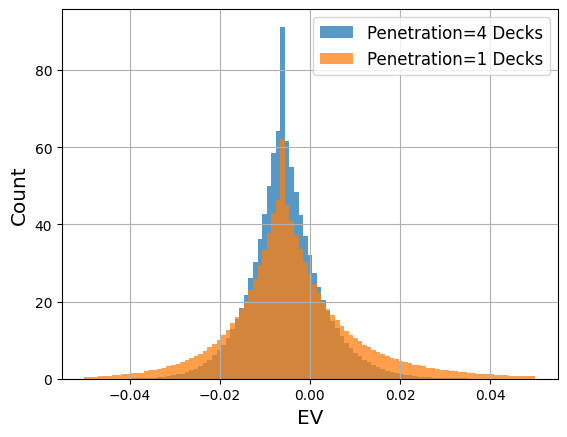

In [33]:
bins = np.linspace(-0.05, 0.05, 100)
for pen in [0.5, 0.125]: #[0.75, 0.5, 0.25, 0.125]:
    df[df.penetration >= pen].EV.hist(bins=bins, label='Penetration=%d Decks' % (8*pen), density=True, alpha=0.75)
    
plt.xlabel('EV', fontsize='x-large')
plt.ylabel('Count', fontsize='x-large')
plt.legend(fontsize='large')

In [36]:
hands = df[df.penetration >= 0.125]
(hands.EV >= 0.01).mean()

0.1374733557474674

In [31]:
(df[df.penetration >= pen].EV > 0.01).mean()

0.03961582652523598